# Exploratory Data Analysis (EDA) - Correlation study

In [1]:
import re, calendar, time, datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import string

In [57]:
df0 = pd.read_csv('../data/train_eda_density_Vavg3.csv')

In [58]:
df0.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_month,pickup_day,pickup_time,...,drop_Dstd,dDstd,dDstd_abs,speed,pick_Vavg,drop_Vavg,pick_Vavg_error,drop_Vavg_error,dVavg,direction
0,2,1,-73.982155,40.767937,-73.964630,40.765602,455,3,14,17.415278,...,7.051886,-1.613326,1.613326,11.856428,12.647951,12.186511,6.055981,6.370717,-0.461440,99.970196
1,1,1,-73.980415,40.738564,-73.999481,40.731152,663,6,12,0.726389,...,5.992918,0.811032,0.811032,9.803659,13.895958,12.365101,7.416681,5.280355,-1.530857,-117.153768
2,2,1,-73.979027,40.763939,-74.005333,40.710087,2124,1,19,11.590000,...,3.353795,-10.339044,10.339044,10.822201,12.220071,16.286034,6.745028,7.882526,4.065962,-159.680165
3,2,1,-74.010040,40.719971,-74.012268,40.706718,429,4,6,19.541944,...,3.479175,-0.266011,0.266011,12.465721,14.588690,15.032400,6.445864,6.956154,0.443711,-172.737700
4,2,1,-73.973053,40.793209,-73.972923,40.782520,435,3,26,13.515278,...,4.316270,2.384939,2.384939,9.836594,15.487073,15.689971,6.578663,6.452190,0.202898,179.473585


In [62]:
df0['dVavg_abs'] = df0['dVavg'].apply(np.abs)
df0['expect_duration_pickup']  = df0['distance']/df0['pick_Vavg']*60*60
df0['expect_duration_dropoff'] = df0['distance']/df0['drop_Vavg']*60*60
df0.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_month,pickup_day,pickup_time,...,speed,pick_Vavg,drop_Vavg,pick_Vavg_error,drop_Vavg_error,dVavg,direction,dVavg_abs,expect_duration_pickup,expect_duration_dropoff
0,2,1,-73.982155,40.767937,-73.964630,40.765602,455,3,14,17.415278,...,11.856428,12.647951,12.186511,6.055981,6.370717,-0.461440,99.970196,0.461440,426.525601,442.675916
1,1,1,-73.980415,40.738564,-73.999481,40.731152,663,6,12,0.726389,...,9.803659,13.895958,12.365101,7.416681,5.280355,-1.530857,-117.153768,1.530857,467.749384,525.658947
2,2,1,-73.979027,40.763939,-74.005333,40.710087,2124,1,19,11.590000,...,10.822201,12.220071,16.286034,6.745028,7.882526,4.065962,-159.680165,4.065962,1881.032760,1411.415136
3,2,1,-74.010040,40.719971,-74.012268,40.706718,429,4,6,19.541944,...,12.465721,14.588690,15.032400,6.445864,6.956154,0.443711,-172.737700,0.443711,366.571259,355.751191
4,2,1,-73.973053,40.793209,-73.972923,40.782520,435,3,26,13.515278,...,9.836594,15.487073,15.689971,6.578663,6.452190,0.202898,179.473585,0.202898,276.289677,272.716786


In [63]:
n_samples = len(df0)
print 'Data samples : ', n_samples
print 'Distance +/-0.5%', df0['distance'].quantile(0.05),  df0['distance'].quantile(0.95)
print 'Duration +/-0.5%', df0['trip_duration'].quantile(0.05),  df0['trip_duration'].quantile(0.95)
print 'Speed +/-0.5%',    df0['speed'].quantile(0.05),  df0['speed'].quantile(0.95)

Data samples :  1458644
Distance +/-0.5% 0.59567376271 11.0193052179
Duration +/-0.5% 180.0 2104.0
Speed +/-0.5% 5.04075462239 29.4417810338


In [64]:
infmin = -float('Inf')
infmax =  float('Inf')
def cutbase_selection( dataframe, name_variable, cut_min=infmin, cut_max=infmax, isBetween=True ):
    if isBetween:
        return dataframe[ ( dataframe[name_variable] >= cut_min ) & ( dataframe[name_variable] < cut_max ) ]
    else:
        return dataframe[ ( dataframe[name_variable] <= cut_min ) | ( dataframe[name_variable] > cut_max ) ]    

In [75]:
# name_variable : [apply, isBetween, cut_min (>=), cut_max(<) ]
cut_dict = { 'trip_duration'     : [ True,  True, 60*5,   60*60*3 ], # 5 min <-> 3 hr 
             'pickup_longitude'  : [ False, True, infmin, infmax ],
             'pickup_latitude'   : [ False, True, infmin, infmax ],
             'dropoff_longitude' : [ False, True, infmin, infmax ],
             'dropoff_latitude'  : [ False, True, infmin, infmax ],
             'vendor_id'         : [ False, True, infmin, infmax ],
             'passenger_count'   : [ False, True, infmin, infmax ],
             'pickup_month'      : [ False, True, infmin, infmax ],
             'pickup_day'        : [ False, True, infmin, infmax ],
             'pickup_time'       : [ False, True, infmin, infmax ],
             'pickup_weekday'    : [ False, True, infmin, infmax ],
             'dropoff_month'     : [ False, True, infmin, infmax ],
             'dropoff_day'       : [ False, True, infmin, infmax ],
             'dropoff_time'      : [ False, True, infmin, infmax ],
             'dropoff_weekday'   : [ False, True, infmin, infmax ],
             'store_and_fwd_flag': [ False, True, infmin, infmax ],
             'distance'          : [ True,  True, 0.59567376271, 11.0193052179 ], # quantile(0.05) <-> quantile(0.95)
             'speed'             : [ True,  True, 5.,     100.],
             'pick_D'            : [ False, True, infmin, infmax ],
             'pick_Dstd'         : [ False, True, infmin, infmax ],
             'drop_D'            : [ False, True, infmin, infmax ],
             'drop_Dstd'         : [ False, True, infmin, infmax ],
             'dDstd'             : [ False, True, infmin, infmax ],
             'dDstd_abs'         : [ False, True, infmin, infmax ],
             'pick_Vavg'         : [ False,  True, infmin, infmax ],
             'drop_Vavg'         : [ False,  True, infmin, infmax ],
             'pick_Vavg_error'   : [ False, True, infmin, infmax ],
             'drop_Vavg_error'   : [ False, True, infmin, infmax ],
             'dVavg'             : [ False, True, infmin, infmax ],
             'dVavg_abs'         : [ False, True, infmin, infmax ],
             'direction'         : [ False, True, infmin, infmax ],
             'expect_duration_pickup' : [ False, True, infmin, infmax ],
             'expect_duration_dropoff': [ False, True, infmin, infmax ],
           }

In [76]:
df = df0.copy()
for var in cut_dict:
    if cut_dict[var][0]:
        print var, cut_dict[var][2], cut_dict[var][3], cut_dict[var][1]
        df = cutbase_selection( df, var, cut_dict[var][2], cut_dict[var][3], cut_dict[var][1] )
n_samples_cut = len(df)
print 'Left samples : %d, eff: %.2f '%( n_samples_cut, float(n_samples_cut)/float(n_samples)) 
df.head()

distance 0.59567376271 11.0193052179 True
speed 5.0 100.0 True
trip_duration 300 10800 True
Left samples : 1100046, eff: 0.75 


,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_month,pickup_day,pickup_time,...,speed,pick_Vavg,drop_Vavg,pick_Vavg_error,drop_Vavg_error,dVavg,direction,dVavg_abs,expect_duration_pickup,expect_duration_dropoff
0,2,1,-73.982155,40.767937,-73.964630,40.765602,455,3,14,17.415278,...,11.856428,12.647951,12.186511,6.055981,6.370717,-0.461440,99.970196,0.461440,426.525601,442.675916
1,1,1,-73.980415,40.738564,-73.999481,40.731152,663,6,12,0.726389,...,9.803659,13.895958,12.365101,7.416681,5.280355,-1.530857,-117.153768,1.530857,467.749384,525.658947
2,2,1,-73.979027,40.763939,-74.005333,40.710087,2124,1,19,11.590000,...,10.822201,12.220071,16.286034,6.745028,7.882526,4.065962,-159.680165,4.065962,1881.032760,1411.415136
3,2,1,-74.010040,40.719971,-74.012268,40.706718,429,4,6,19.541944,...,12.465721,14.588690,15.032400,6.445864,6.956154,0.443711,-172.737700,0.443711,366.571259,355.751191
4,2,1,-73.973053,40.793209,-73.972923,40.782520,435,3,26,13.515278,...,9.836594,15.487073,15.689971,6.578663,6.452190,0.202898,179.473585,0.202898,276.289677,272.716786


In [77]:
df[ df['pick_Vavg_error'].isnull() ]['pick_pixel']

Series([], Name: pick_pixel, dtype: int64)

In [78]:
df[ df['drop_Vavg_error'].isnull() ]['drop_pixel']

Series([], Name: drop_pixel, dtype: int64)

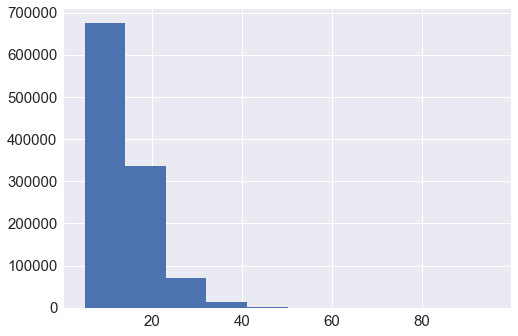

In [79]:
plt.hist(df['speed'].values)
plt.show()

In [80]:
df.columns

Index([u'vendor_id', u'passenger_count', u'pickup_longitude',
       u'pickup_latitude', u'dropoff_longitude', u'dropoff_latitude',
       u'trip_duration', u'pickup_month', u'pickup_day', u'pickup_time',
       u'pickup_weekday', u'pickup_timestamp', u'dropoff_month',
       u'dropoff_day', u'dropoff_time', u'dropoff_weekday',
       u'dropoff_timestamp', u'store_and_fwd_flag', u'distance',
       u'pick_xlabel', u'pick_ylabel', u'drop_xlabel', u'drop_ylabel',
       u'pick_pixel', u'drop_pixel', u'pick_D', u'pick_Dstd', u'drop_D',
       u'drop_Dstd', u'dDstd', u'dDstd_abs', u'speed', u'pick_Vavg',
       u'drop_Vavg', u'pick_Vavg_error', u'drop_Vavg_error', u'dVavg',
       u'direction', u'dVavg_abs', u'expect_duration_pickup',
       u'expect_duration_dropoff'],
      dtype='object')

In [81]:
cols = ['trip_duration',
        #'pickup_longitude',
        #'pickup_latitude', 
        #'dropoff_longitude', 
        #'dropoff_latitude',
        'vendor_id', 
        'passenger_count',
        'pickup_month',
        'pickup_day',
        'pickup_time',
        'pickup_weekday', 
        #'pickup_timestamp', 
        'dropoff_month',
        'dropoff_day', 
        'dropoff_time', 
        'dropoff_weekday',
        #'dropoff_timestamp', 
        'store_and_fwd_flag', 
        'distance',
        #'pick_xlabel', 
        #'pick_ylabel', 
        #'drop_xlabel', 
        #'drop_ylabel',
        #'pick_pixel', 
        #'drop_pixel', 
        'pick_D', 
        'pick_Dstd', 
        'drop_D',
        'drop_Dstd', 
        'dDstd', 
        'dDstd_abs',
        #'speed', 
        'pick_Vavg', 
        'drop_Vavg', 
        'pick_Vavg_error',
        'drop_Vavg_error',
        'dVavg',
        'dVavg_abs',
        'direction',
        'expect_duration_pickup', 
        'expect_duration_dropoff']
len(cols)

28

In [82]:
cm = np.corrcoef(df[cols].values.T)

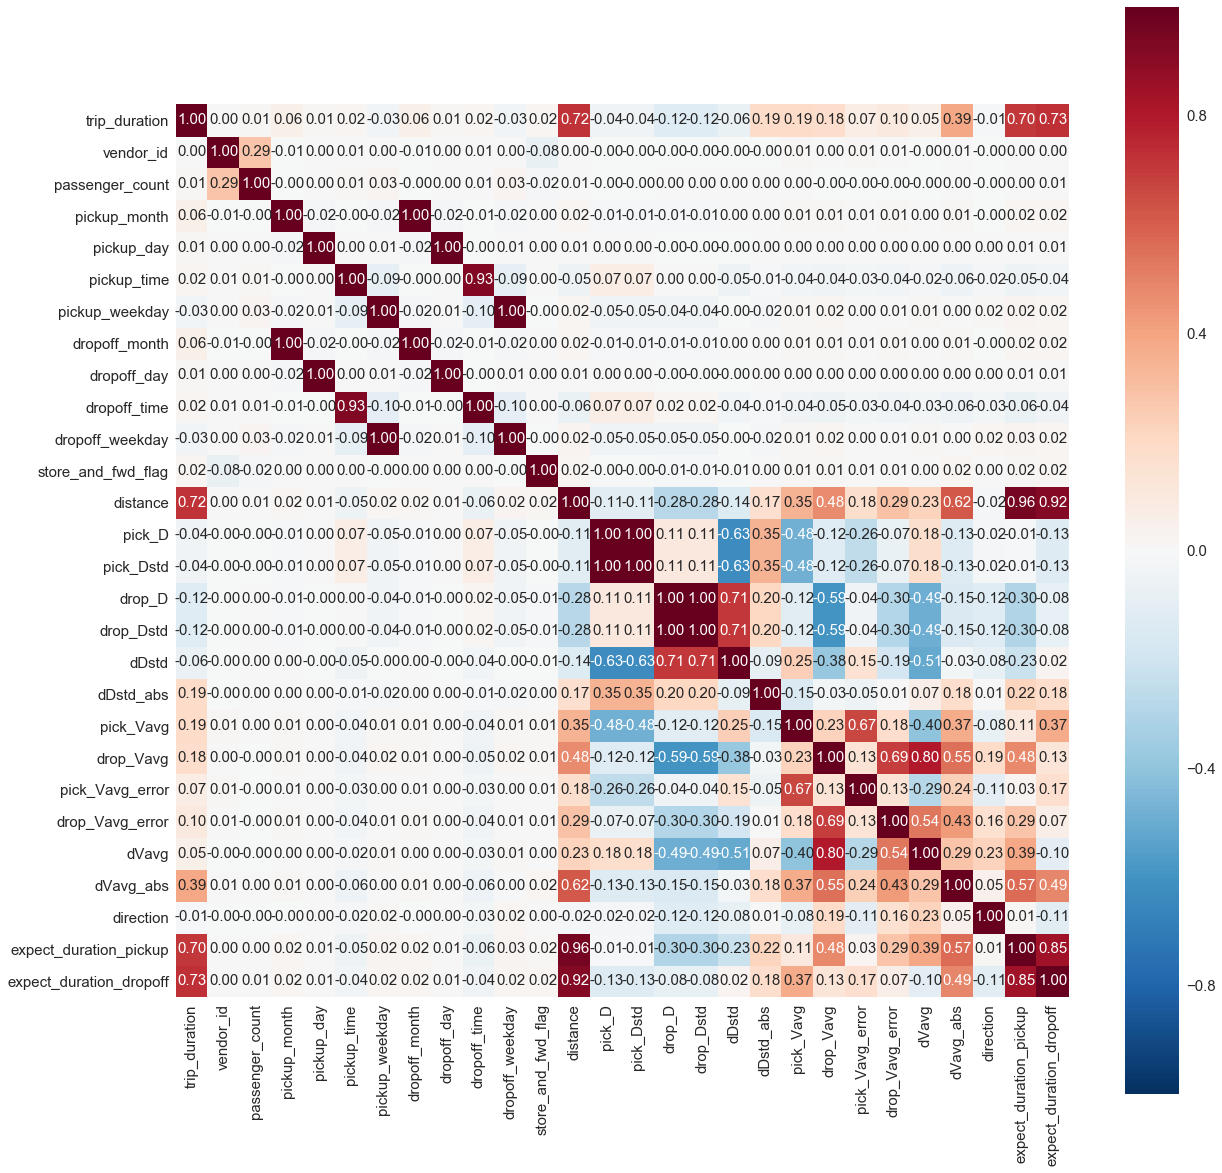

In [83]:
plt.figure(figsize=(20,20))
sns.set(font_scale=1.5)
hm = sns.heatmap( cm, 
                cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size':15},
                yticklabels=cols,
                xticklabels=cols, 
                )
plt.show()

In [ ]:
#df_train = df.sample(50000)